# Churn Prediction using Machine Learning

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt


## Data Loading

In [2]:

# Load the data
data = pd.read_csv("BankChurners_clean.csv")
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Preprocessing

In [3]:

# Label Encoding for binary categories
label_encoders = {}
for column in ['Attrition_Flag', 'Gender']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# One-Hot Encoding for multi-category columns
data = pd.get_dummies(data, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

# Feature Scaling
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns.remove('Attrition_Flag')
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


## Model Building with Random Forest

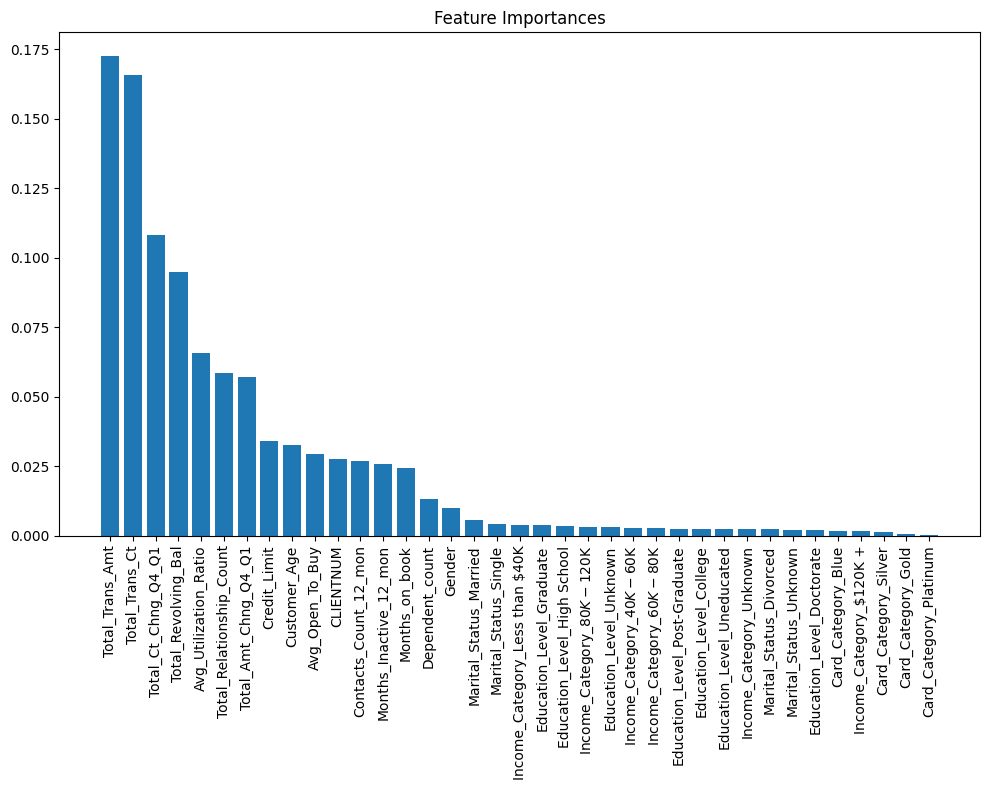

In [4]:

# Splitting the data into training and test sets
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training using Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Feature Importance Visualization
importances = rf_classifier.feature_importances_
plt.figure(figsize=(10, 8))
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


## Model Evaluation for Random Forest

In [5]:

# Model Evaluation
y_pred = rf_classifier.predict(X_test)
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}
metrics


{'Accuracy': 0.9506416584402764,
 'Precision': 0.9537353052711415,
 'Recall': 0.988989382618954,
 'ROC-AUC': 0.8715108203417351}

## Model Building with XGBoost

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

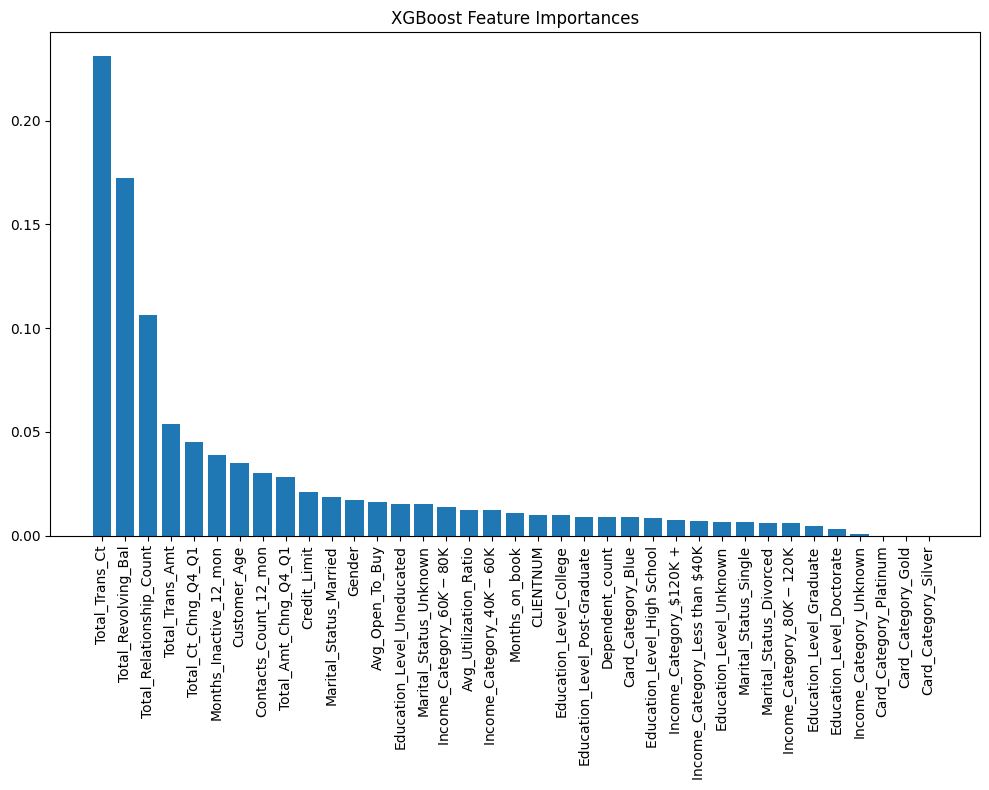

In [6]:

import xgboost as xgb

# XGBoost training
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# XGBoost Feature Importance Visualization
xgb_importances = xgb_classifier.feature_importances_
plt.figure(figsize=(10, 8))
indices = np.argsort(xgb_importances)[::-1]
plt.title("XGBoost Feature Importances")
plt.bar(range(X_train.shape[1]), xgb_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [7]:
# Model Evaluation for XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb)
}
xgb_metrics

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

{'Accuracy': 0.9631457716354064,
 'Precision': 0.9802449624654287,
 'Recall': 0.9756193472276838,
 'ROC-AUC': 0.9374064478073902}


## Unsupervised Learning (Clustering)

In this section, we'll perform clustering to group similar customers together. 
Clustering can provide insights into customer segments, allowing businesses to target specific segments more effectively.



### Determining Optimal Number of Clusters

To determine the optimal number of clusters, we'll use the Elbow method with the K-Means clustering algorithm.


c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kme

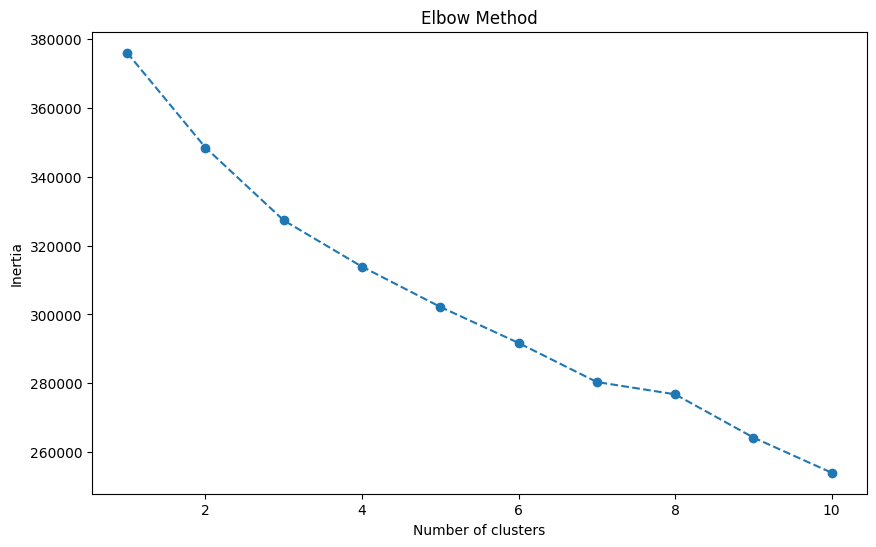

c:\Users\tsepu\Documents\GitHub\Churn_prediction\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster,0,1,2
CLIENTNUM,0.021129,-0.016580,0.021225
Attrition_Flag,0.844681,0.835271,0.843705
Customer_Age,-0.006622,0.014018,-0.079114
Gender,1.043971,-0.729896,0.314845
Dependent_count,0.068243,-0.057655,0.102255
Months_on_book,-0.002392,0.008303,-0.055185
Total_Relationship_Count,0.036736,0.014259,-0.317020
Months_Inactive_12_mon,-0.018893,0.019968,-0.061215
Contacts_Count_12_mon,0.045203,-0.029526,-0.003433
Credit_Limit,0.400465,-0.497258,1.905481


In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using the Elbow method to find the optimal number of clusters
inertia = []
range_values = range(1, 11)  # checking for up to 10 clusters
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Implementing K-Means clustering with 3 clusters (as determined by the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Analyzing the characteristics of each cluster
cluster_summary = data.groupby('Cluster').mean().transpose()
cluster_summary
